In [156]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [157]:
data=pd.read_csv("C:\\Users\\Dedshan Vimukthi\\Documents\\Kaggel_Dataset\\train.CSV")
#testdata=pd.read_csv("C:\\Users\\Dedshan Vimukthi\\Documents\\Kaggel_Dataset\\test.CSV")

In [158]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
data.duplicated().sum()

0

In [161]:
data.drop("PassengerId",axis=1,inplace=True)

In [162]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [164]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [165]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [166]:
data["Embarked"].fillna(data["Embarked"].mode(),inplace=True)

In [167]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [168]:
data.drop("Cabin",axis=1,inplace=True)

In [169]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [170]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [171]:
le=LabelEncoder()
le

LabelEncoder()

In [172]:
data["Sex"]=le.fit_transform(data["Sex"])

In [173]:
data.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Q


In [174]:
one=OneHotEncoder()
one

OneHotEncoder()

In [175]:
ohot_encoded=one.fit_transform(data["Embarked"].values.reshape(len(data["Embarked"].values),1)).toarray()

In [176]:
ohot_encoded2=ohot_encoded[:,:3].astype(int)

In [177]:
df_ohot=pd.DataFrame(ohot_encoded2,columns=["C","Q","S"])

In [178]:
df_ohot.head(6)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0


In [179]:
df_ohot.isnull().sum()

C    0
Q    0
S    0
dtype: int64

In [180]:
len(df_ohot)

891

In [181]:
len(data)

891

In [182]:
df_ohot.drop("Q",axis=1,inplace=True)

In [183]:
df_ohot.head()

,C,S
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [184]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [185]:
data=pd.concat([data,df_ohot],axis=1)

In [186]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1


In [187]:
data.drop("Embarked",axis=1,inplace=True)

In [188]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


In [189]:
data.drop("Name",axis=1,inplace=True)

In [190]:
data.drop("Ticket",axis=1,inplace=True)

In [191]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [192]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Bagging Classifier

In [194]:
bcl=BaggingClassifier(n_estimators=100)
bcl.fit(x_train,y_train)
y_pred=bcl.predict(x_test)
accuracy_score(y_pred,y_test)

0.8268156424581006

In [195]:
submition_pred=bcl.predict(testdata)

ValueError: Number of features of the model must match the input. Model n_features is 8 and input n_features is 11.

# Random Forest

In [113]:
rfcl=RandomForestClassifier(n_estimators=500)
rfcl.fit(x_train,y_train)
y_pred=rfcl.predict(x_test)
accuracy_score(y_pred,y_test)

0.8324022346368715

In [108]:
params={"n_estimators":[100,200,300],"criterion":["gini","entropy"]}
model=RandomForestClassifier()
cval=KFold(n_splits=5)

In [109]:
gsearch=GridSearchCV(model,params,cv=cval)

In [110]:
result=gsearch.fit(x_train,y_train)
result.best_params_

{'criterion': 'gini', 'n_estimators': 200}

In [111]:
rfcl=RandomForestClassifier(n_estimators=200)
rfcl.fit(x_train,y_train)
y_pred=rfcl.predict(x_test)
accuracy_score(y_pred,y_test)

0.8212290502793296

# Stacking Classifier

In [152]:
model1=KNeighborsClassifier(n_neighbors=5)
model2=LogisticRegression()
model3=RandomForestClassifier()

T1=("knn",model1)
T2=("lgr",model2)

metamodel=RandomForestClassifier()

stcl=StackingClassifier(estimators=[T1,T2],final_estimator=metamodel)

stcl.fit(x_train,y_train)
y_pred=stcl.predict(x_test)
accuracy_score(y_pred,y_test)


C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.7541899441340782

# Voting Classifier

In [155]:
model1=KNeighborsClassifier(n_neighbors=5)
model2=LogisticRegression()
model3=RandomForestClassifier()

T1=("knn",model1)
T2=("lgr",model2)
T3=("rf",model3)

vc=VotingClassifier(estimators=[T1,T2,T3])

vc.fit(x_train,y_train)
y_pred=vc.predict(x_test)
accuracy_score(y_pred,y_test)

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8379888268156425

# Boostrapping

In [39]:
boot_ind=np.random.choice(np.arange(x_train.shape[0]),x_train.shape[0])
x_train_boot=x_train[boot_ind]
y_train_boot=y_train[boot_ind]
model=LogisticRegression()
model.fit(x_train_boot,y_train_boot)
y_pred=model.predict(x_test)
accuracy_score(y_pred,y_test)

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8044692737430168

In [64]:
for i in range(5):
    boot_ind=np.random.choice(np.arange(x_train.shape[0]),x_train.shape[0])
    x_train_boot=x_train[boot_ind]
    y_train_boot=y_train[boot_ind]
    model=LogisticRegression()
    model.fit(x_train_boot,y_train_boot)
    y_pred=model.predict(x_test)
    print(accuracy_score(y_pred,y_test))
print(" ")
print(np.array(accuracy_score(y_pred,y_test)).mean())

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.776536312849162
0.7932960893854749
0.7821229050279329
0.7932960893854749
0.8044692737430168
 
0.8044692737430168


C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [52]:
for i in range(5):
    boot_ind=np.random.choice(np.arange(x_train.shape[0]),x_train.shape[0])
    x_train_boot=x_train[boot_ind]
    y_train_boot=y_train[boot_ind]
    model=LogisticRegression()
    model.fit(x_train_boot,y_train_boot)
    y_pred=model.predict(x_test[0].reshape(1,8))
    print(y_pred)
    #print(accuracy_score(y_pred,y_test))

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0]
[0]
[0]
[0]
[0]


C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
x_test[0].reshape(1,8)

array([[ 3.        ,  1.        , 29.69911765,  0.        ,  0.        ,
        14.4583    ,  1.        ,  0.        ]])

In [47]:
model=LogisticRegression()
model

LogisticRegression()

In [297]:
model.fit(x_train,y_train)

C:\Users\Dedshan Vimukthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [299]:
y_pred=model.predict(x_test)

In [302]:
accuracy_score(y_pred,y_test)

0.7932960893854749

# KNN

In [339]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [340]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [341]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [342]:
xtr,xts,ytr,yts=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [344]:
K=range(1,21)
Errors=[]

for k in K:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(xtr,ytr)
    ypr=model.predict(xts)
    Errors.append(1-accuracy_score(yts,ypr))

In [345]:
Errors

[0.3776223776223776,
 0.3426573426573427,
 0.36363636363636365,
 0.32167832167832167,
 0.3356643356643356,
 0.3356643356643356,
 0.35664335664335667,
 0.32867132867132864,
 0.32867132867132864,
 0.3426573426573427,
 0.36363636363636365,
 0.35664335664335667,
 0.36363636363636365,
 0.36363636363636365,
 0.35664335664335667,
 0.35664335664335667,
 0.35664335664335667,
 0.32167832167832167,
 0.32867132867132864,
 0.32167832167832167]

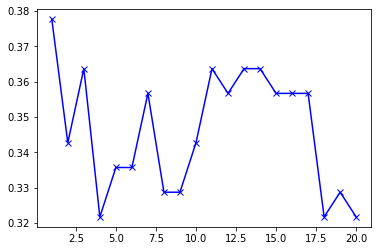

In [348]:
plt.plot(K,Errors,"bx-")
plt.show()

In [357]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [358]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [352]:
model=KNeighborsClassifier(n_neighbors=4)

In [353]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [355]:
y_pred=model.predict(x_test)

In [356]:
accuracy_score(y_pred,y_test)

0.7039106145251397

In [359]:
params={"n_neighbors":[1,2,3,4,5,6,7,8,9,10]}
model=KNeighborsClassifier()
cval=KFold(n_splits=10)

In [360]:
gsearch=GridSearchCV(model,params,cv=cval)

In [361]:
results=gsearch.fit(x_train,y_train)

In [362]:
results.best_params_

{'n_neighbors': 5}

In [366]:
model=KNeighborsClassifier(n_neighbors=5)

In [367]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [368]:
accuracy_score(y_pred,y_test)

0.7039106145251397